# Py - RTTOV

[PDF Python Interface Guide - NWP/SAF](https://nwp-saf.eumetsat.int/site/download/documentation/rtm/docs_rttov12/rttov-wrapper.pdf)



In [5]:
# System information
# import pyrttov
import numpy as np
import os, sys, glob
import xarray
print(sys.executable)
print(sys.version_info)
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
import numpy as np
import os, sys, glob
import xarray
print(sys.executable)
print(sys.version_info)
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua3 as eua
import pickle
import multiprocessing
from functools import partial

/users/staff/a1400070/.conda/envs/uv/bin/python
sys.version_info(major=3, minor=9, micro=6, releaselevel='final', serial=0)
/users/staff/a1400070/.conda/envs/uv/bin/python
sys.version_info(major=3, minor=9, micro=6, releaselevel='final', serial=0)


/tmp/ipykernel_2182185/2606286694.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
/tmp/ipykernel_2182185/2606286694.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [6]:
statlist = glob.glob('/mnt/users/scratch/leo/scratch/converted_v7/*11035*_CEUAS_merged_v1.nc')
df = eua.CDMDataset(filename = statlist[0]).to_dataframe(groups=['observations_table'], variables=['observed_variable', 'observation_value', 'date_time', 'z_coordinate', 'latitude', 'longitude'])

df = df[df.date_time > '1979']
df = df[df.z_coordinate.isin([1000,2000,3000,5000,7000,10000,15000,20000,25000,30000,40000,50000,70000,85000,92500,100000])]
df = df.rename({'latitude':'lat','longitude':'lon', 'date_time':'time', 'z_coordinate':'plev'}, axis='columns')
all_dfsh = df[df.observed_variable == 39]
all_dfsh = all_dfsh.rename({'observation_value':'hus'}, axis='columns')
all_dfta = df[df.observed_variable == 85]
all_dfta = all_dfta.rename({'observation_value':'ta'}, axis='columns')

In [7]:
plevs = [1000,2000,3000,5000,7000,10000,15000,20000,25000,30000,40000,50000,70000,85000,92500,100000]
pcheck = [[] for i in range(len(plevs))]
dates = []
        
for yr in range(1979,2022,1):
    for mon in range(int(str(yr)+'01'), int(str(yr)+'13'), 1):
        # add file download once on srvx2
        dfsh = all_dfsh.loc[(all_dfsh['time'].dt.year==int(str(mon)[:4])) & (all_dfsh['time'].dt.month==int(str(mon)[-2:]))]
        dfta = all_dfta.loc[(all_dfta['time'].dt.year==int(str(mon)[:4])) & (all_dfta['time'].dt.month==int(str(mon)[-2:]))]
        df = dfta.merge(dfsh, how='inner', on=['plev', 'time', 'lat', 'lon'])
        mon_mean = df.groupby(['plev']).aggregate({"ta":np.mean, "hus":np.mean})
        for j in [1000,2000,3000,5000,7000,10000,15000,20000,25000,30000,40000,50000,70000,85000,92500,100000]:
            if len(df[df.plev == j]) < 10:
                mon_mean = mon_mean[mon_mean.index != j]
        dates.append(mon)
        for k in range(len(plevs)):
            if plevs[k] in mon_mean.index:
                pcheck[k].append(1)
            else:
                pcheck[k].append(0)

In [9]:
import matplotlib.pyplot as plt

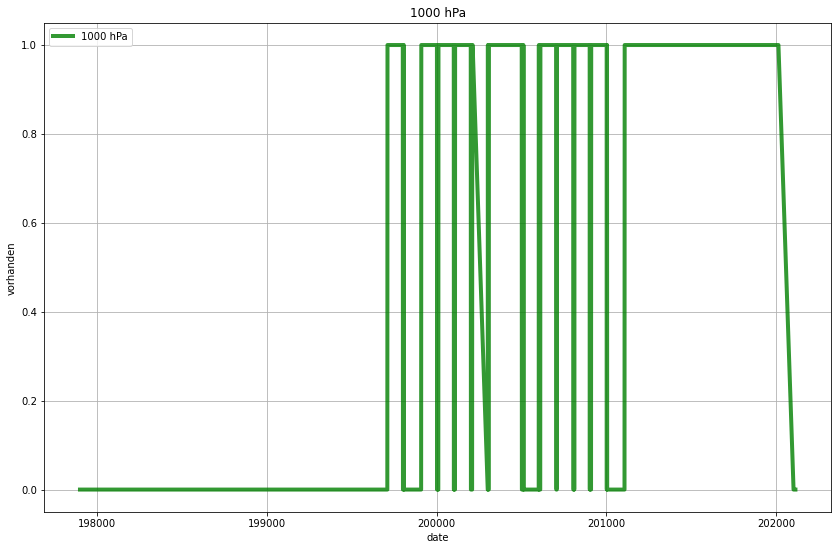

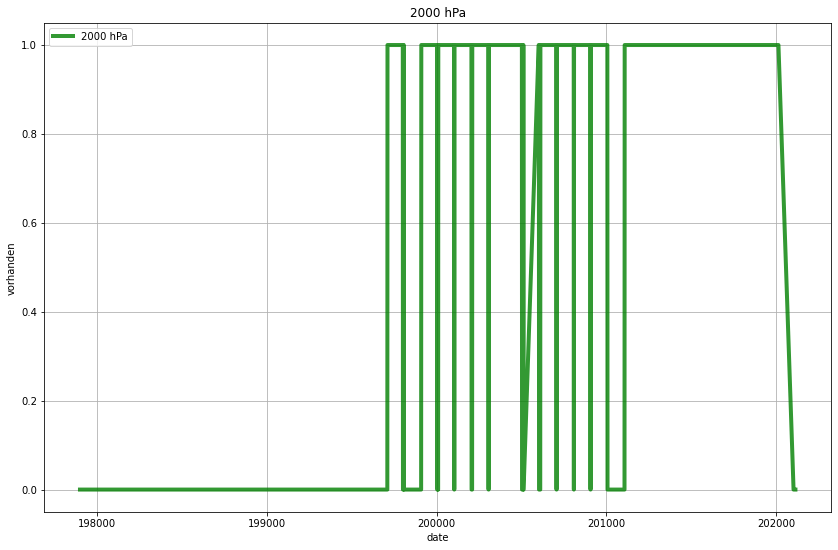

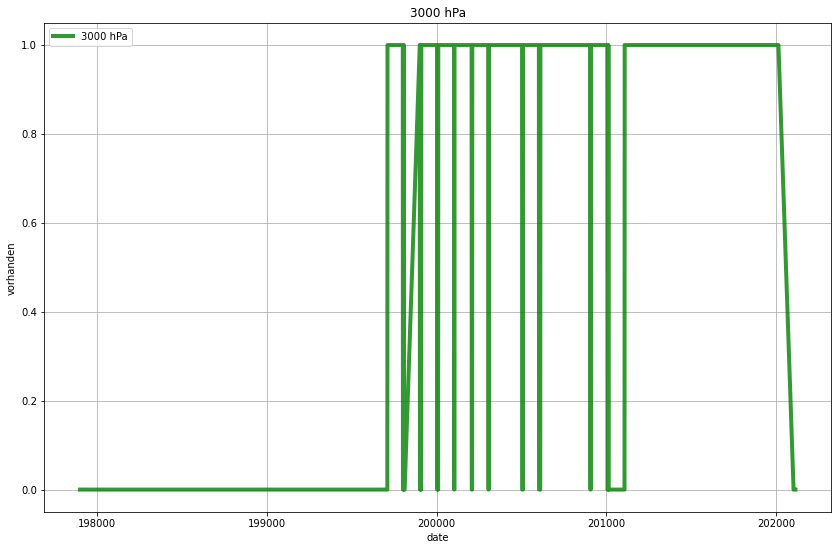

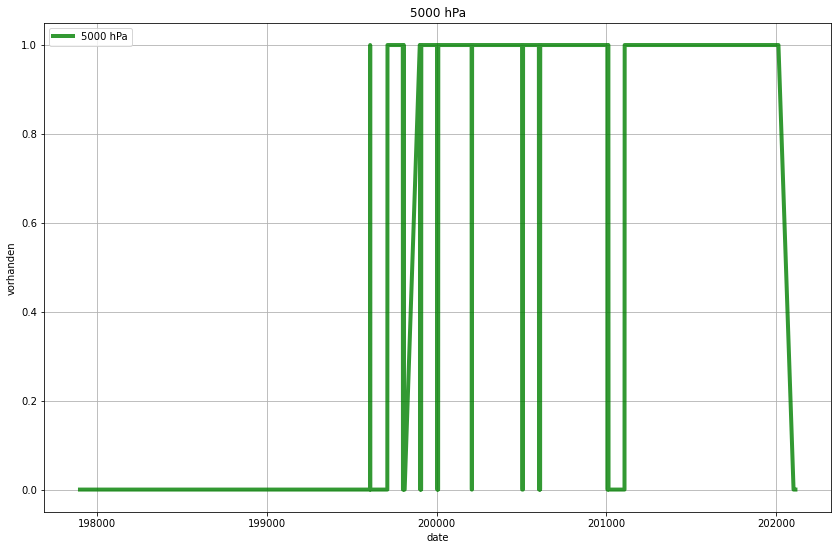

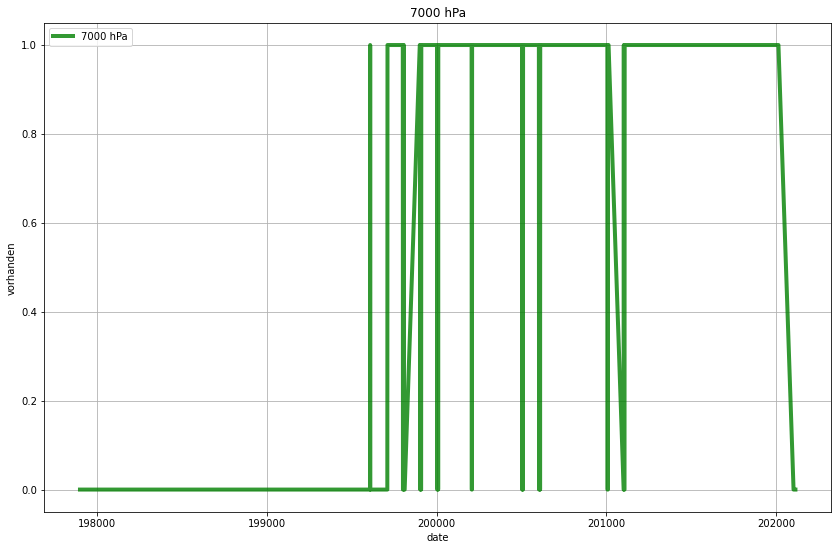

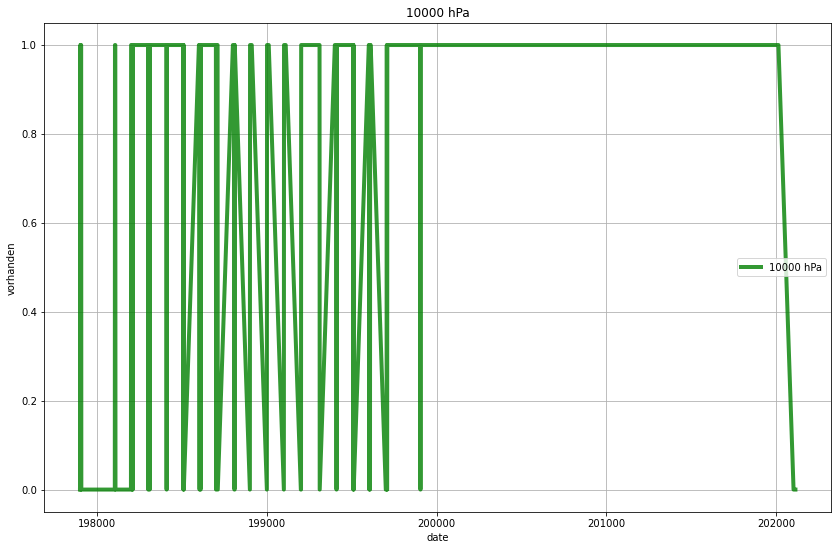

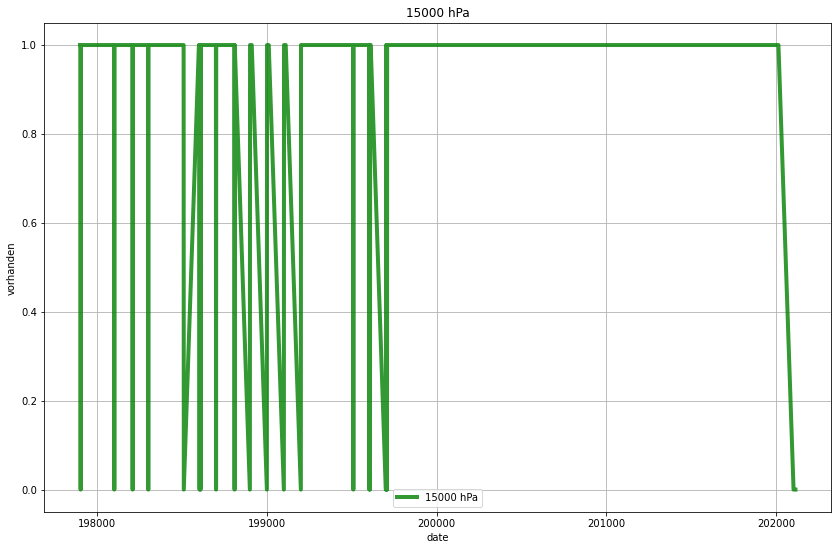

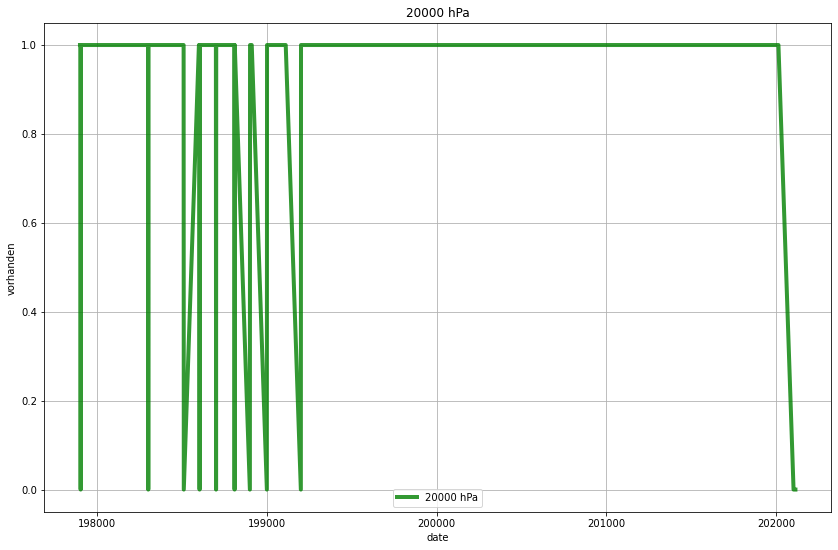

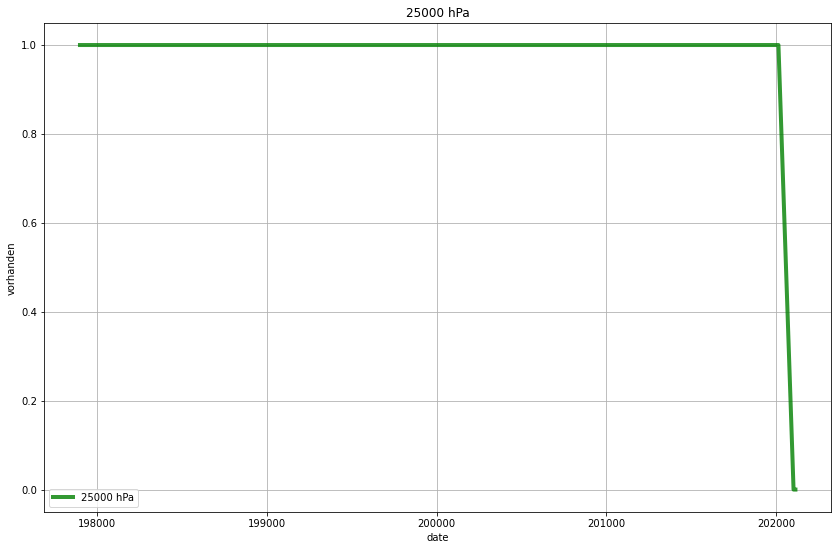

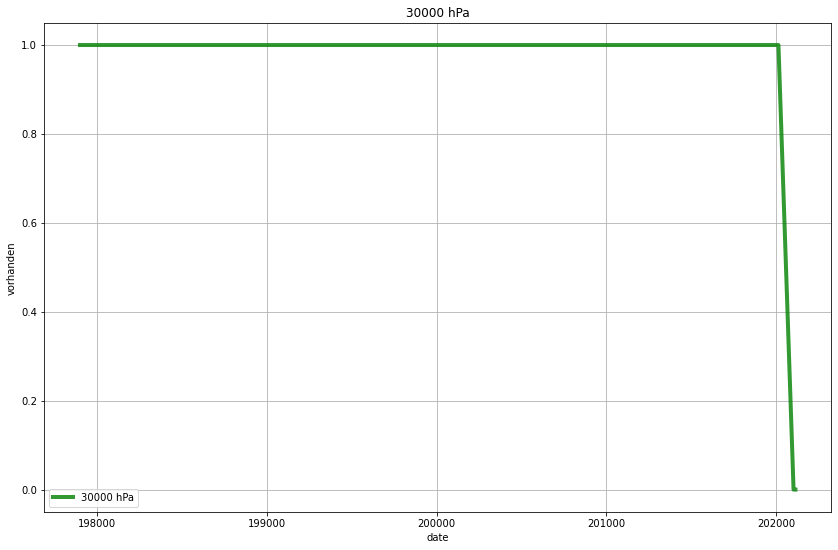

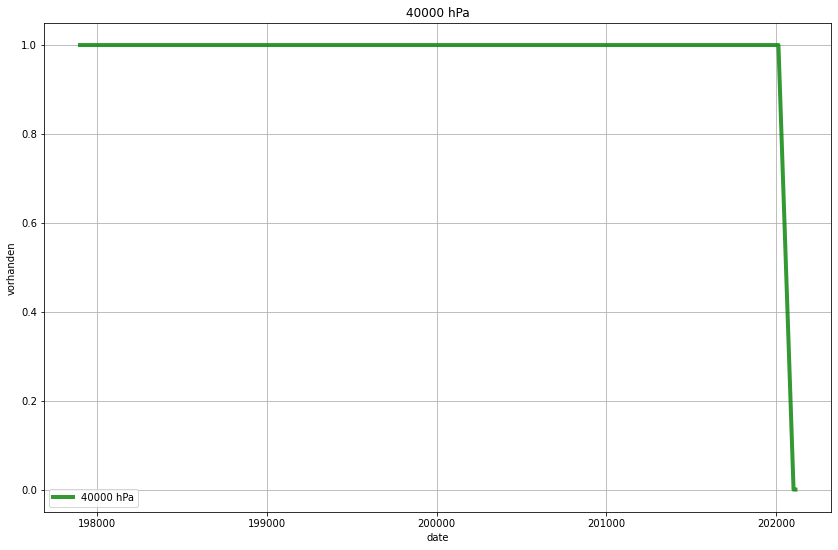

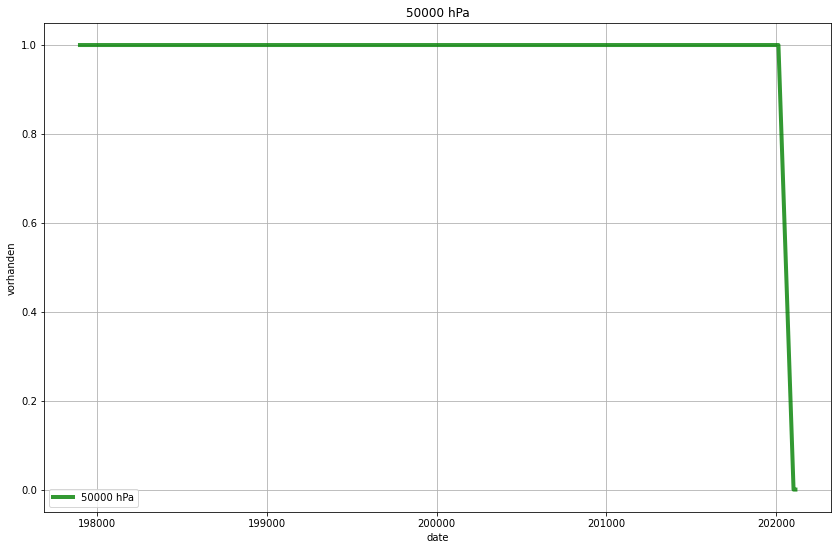

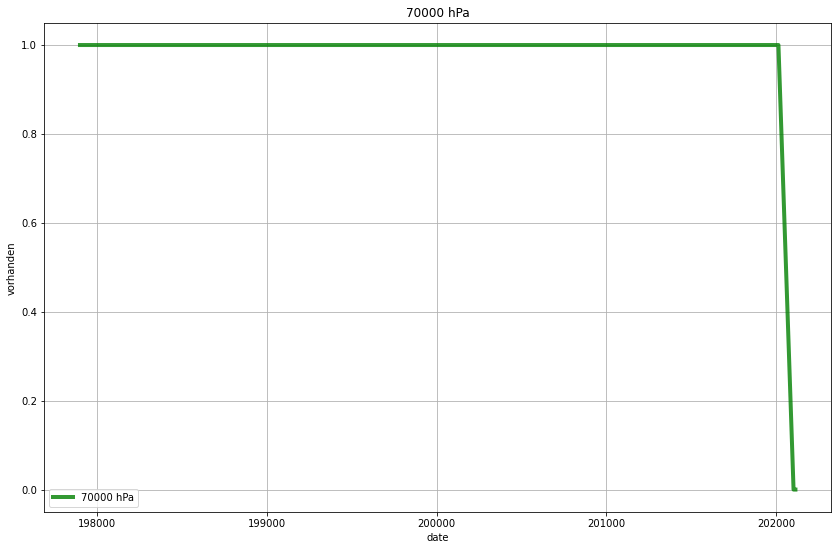

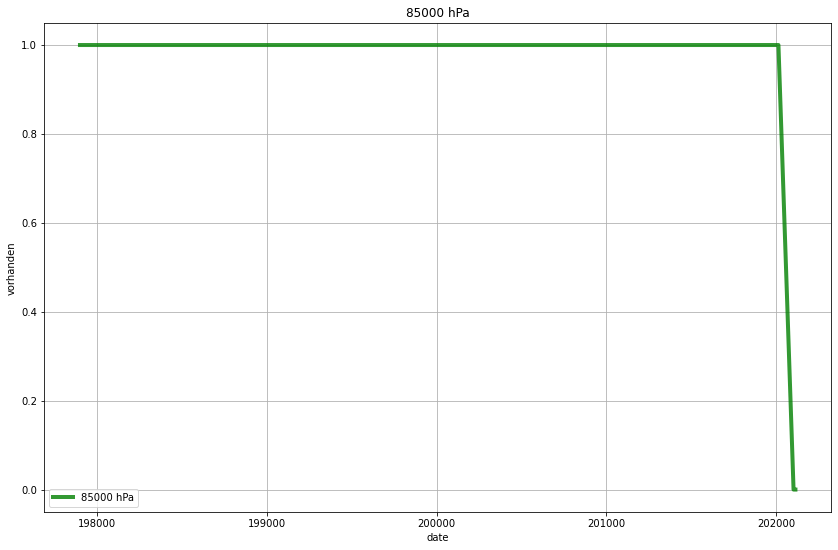

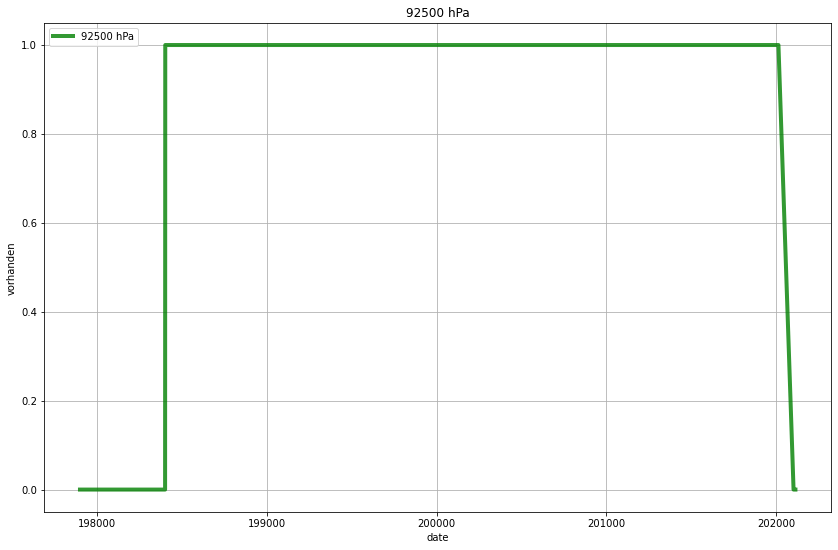

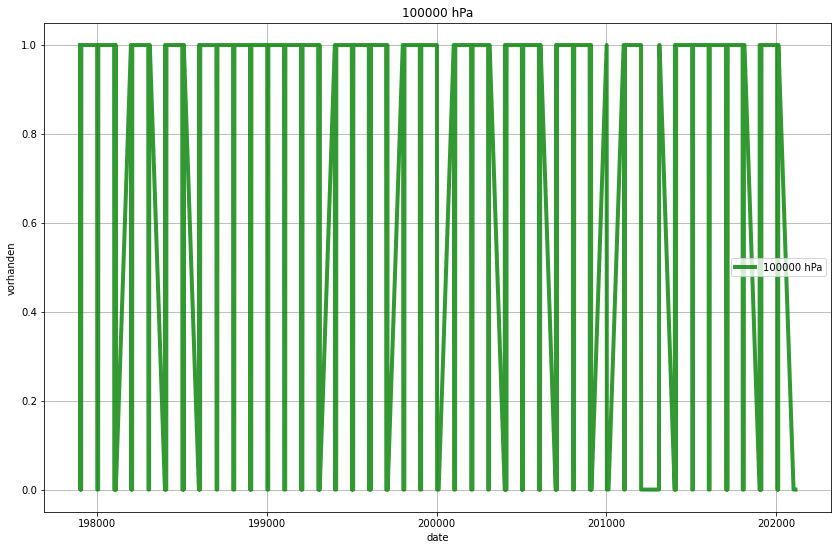

In [10]:
plt.rcParams['figure.figsize'] = [12, 8]
for k in range(len(plevs)):
    fig, ax = plt.subplots()

    ax.grid()
    ax.set(xlabel='date', ylabel='vorhanden', title=str(plevs[k])+' hPa')
    ax.plot(dates, pcheck[k], color='green', label=str(plevs[k])+' hPa', linewidth=4, alpha=0.8)
    ax.legend()

    fig.tight_layout(pad=2.0)
    plt.show()
    plt.close()